# CLASSWORK 4

# Social Media Scrapping

In [35]:
# Importing Praw

import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="8bI5CMEilHwGO-t7FeQjhA",
    client_secret="t9Qs679JldgejCxGvdWf8SS1CvQTsw",
    user_agent=user_agent
)

In [36]:
# Importing pandas, numpy and regex

import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [37]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Indian_politics").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Jignesh Mewani Arrest
uhyvbr
Rough-Night9155
1651639764.0
1
0.67
https://www.reddit.com/r/Indian_Politics/comments/uhyvbr/jignesh_mewani_arrest/
0


In [38]:
headlines = set()
for submission in reddit.subreddit("Indian_politics").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

240


In [39]:
#Create a dataframe from the scrapped data 

politics_df = pd.DataFrame(headlines)
politics_df.head()

,0
0,Indian legislative leader’s visit an important...
1,Modi Sarkar releases surgical strike video!
2,Liberandu exposed
3,"Afghan President Ghani, US Secretary of State ..."
4,Video of teenager murdered in Brazil shared as...


In [40]:
politics_df.columns

RangeIndex(start=0, stop=1, step=1)

In [41]:
politics_df.columns = ['Titles']

In [42]:
politics_df.head()

,Titles
0,Indian legislative leader’s visit an important...
1,Modi Sarkar releases surgical strike video!
2,Liberandu exposed
3,"Afghan President Ghani, US Secretary of State ..."
4,Video of teenager murdered in Brazil shared as...


In [43]:
politics_df.Titles.duplicated().sum() 

0

In [44]:
#Clean the text

#Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text

politics_df["Titles"]= politics_df["Titles"].apply(cleanTxt)

#Show the clean text

politics_df.head()

,Titles
0,Indian legislative leader’s visit an important...
1,Modi Sarkar releases surgical strike video!
2,Liberandu exposed
3,"Afghan President Ghani, US Secretary of State ..."
4,Video of teenager murdered in Brazil shared as...


In [45]:
#Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text

politics_df["Titles"]= politics_df["Titles"].apply(remove_emoji)

#Show the clean text

politics_df.head()

,Titles
0,Indian legislative leader’s visit an important...
1,Modi Sarkar releases surgical strike video!
2,Liberandu exposed
3,"Afghan President Ghani, US Secretary of State ..."
4,Video of teenager murdered in Brazil shared as...


In [46]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [47]:
#Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe

politics_df['Subjectivity'] = politics_df['Titles'].apply(getSubjectivity)
politics_df['Polarity'] = politics_df['Titles'].apply(getPolarity)

#Now display data

politics_df.head()


,Titles,Subjectivity,Polarity
0,Indian legislative leader’s visit an important...,0.416667,0.05
1,Modi Sarkar releases surgical strike video!,0.000000,0.00
2,Liberandu exposed,0.000000,0.00
3,"Afghan President Ghani, US Secretary of State ...",0.000000,0.00
4,Video of teenager murdered in Brazil shared as...,0.000000,0.00


In [48]:
#Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
politics_df["Insight"] = politics_df["Polarity"].apply(getInsight)

politics_df.head(20)

,Titles,Subjectivity,Polarity,Insight
0,Indian legislative leader’s visit an important...,0.416667,0.050000,Positive
1,Modi Sarkar releases surgical strike video!,0.000000,0.000000,Neutral
2,Liberandu exposed,0.000000,0.000000,Neutral
3,"Afghan President Ghani, US Secretary of State ...",0.000000,0.000000,Neutral
4,Video of teenager murdered in Brazil shared as...,0.000000,0.000000,Neutral
5,"OPEC takes part in India Energy Forum, the Sec...",0.500000,0.050000,Positive
6,"No more fake posts, requests Amit Shah!",0.750000,-0.437500,Negative
7,Political Branding,0.100000,0.000000,Neutral
8,Can someone please help me understand how numb...,0.500000,0.500000,Positive
9,vote on account in India,0.000000,0.000000,Neutral


In [49]:
# Importing seaborn, warnings, matplotlib
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

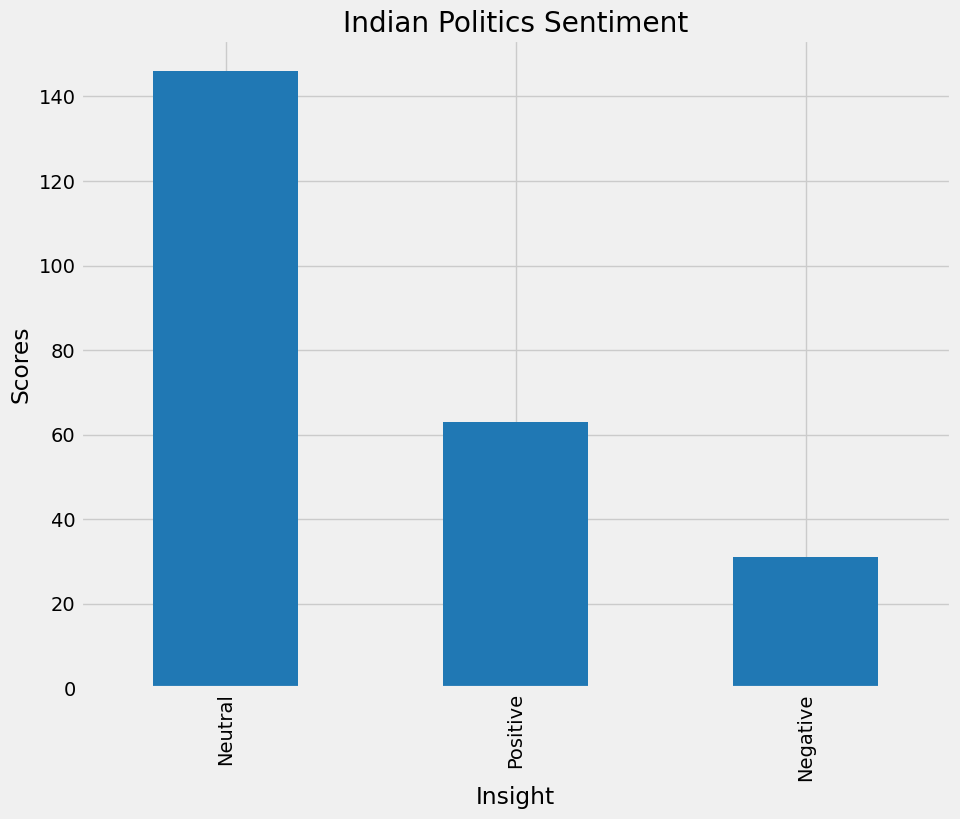

In [50]:
#Plot the values count of sentiment

plt.title("Indian Politics Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
politics_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

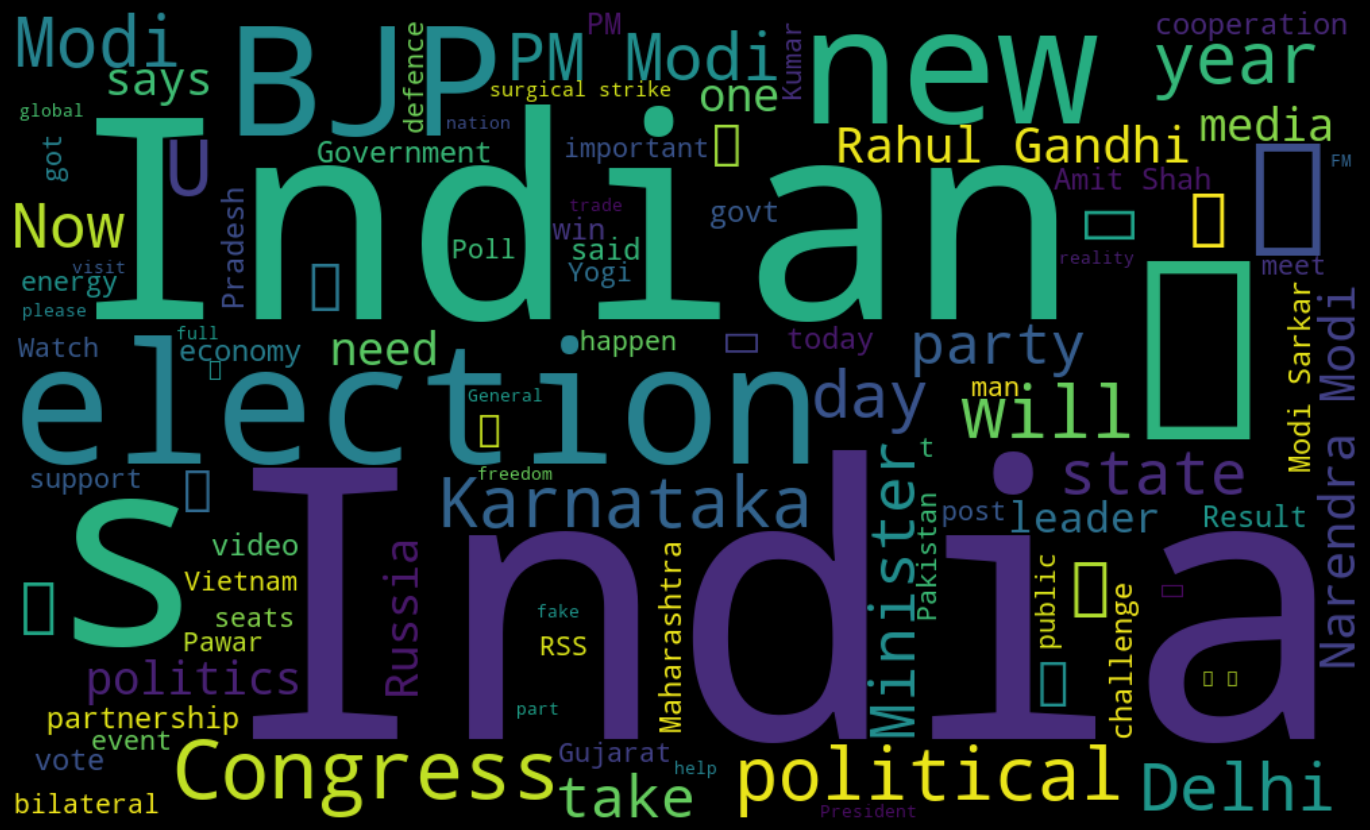

In [51]:
text = ' '.join( [twts for twts in politics_df['Titles']] ) #To join all tweet
# generate word cloud 

wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
    
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
